In [76]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

def quantile_loss(y_pred, y_true, quantile):
    error = y_true - y_pred
    loss = torch.max(quantile * error, (quantile - 1) * error)
    return torch.mean(loss)

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
quantiles = np.arange(0.05, 1, 0.05)

def criterion(y_pred, y_true):
    loss = 0
    i = 0
    for i in range(len(quantiles)):
        quantile = quantiles[i]
        prediction = y_pred[:,i]
        loss += quantile_loss(prediction, y_true[:,0], quantile)
    return loss

torch.manual_seed(42)

input_dim = 1
hidden_dim = 10
output_dim = len(quantiles)
learning_rate = 0.01
num_epochs = 1300
num_samples = 100000

model = SimpleMLP(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Generate some dummy data
X = torch.randn(num_samples, input_dim)
y = 3 * X + 2 + torch.randn(num_samples, 1)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
https://github.com/Javicadserres/wind-production-forecast/blob/28310d7dab7b47d7db3d690580505c1a456e471b/src/model/model.py

In [96]:
# After training, you can use the model for prediction
# For example:
input_example = torch.tensor([[0.6]])  # Example input
predicted_output = model(input_example) -3*input_example - 2
def norm_quantile(p):
    p = torch.Tensor([p])
    return float(np.sqrt(2) * torch.erfinv(2 * p - 1))
{q: [float(p), norm_quantile(q)] for q,p in zip(quantiles, (predicted_output)[0])}



{0.05: [-1.6420646905899048, -1.6448533535003662],
 0.1: [-1.2895735502243042, -1.2815515995025635],
 0.15000000000000002: [-1.0398911237716675, -1.0364333391189575],
 0.2: [-0.8465629816055298, -0.8416212201118469],
 0.25: [-0.6781340837478638, -0.6744897365570068],
 0.3: [-0.5269826650619507, -0.5244004726409912],
 0.35000000000000003: [-0.388400673866272, -0.3853204846382141],
 0.4: [-0.25184643268585205, -0.2533470690250397],
 0.45: [-0.11865341663360596, -0.12566137313842773],
 0.5: [0.006416797637939453, 0.0],
 0.55: [0.12849903106689453, 0.12566137313842773],
 0.6000000000000001: [0.263214111328125, 0.25334715843200684],
 0.6500000000000001: [0.389254093170166, 0.38532039523124695],
 0.7000000000000001: [0.5281014442443848, 0.5244004726409912],
 0.7500000000000001: [0.6802792549133301, 0.6744897365570068],
 0.8: [0.8429708480834961, 0.8416212201118469],
 0.8500000000000001: [1.0432443618774414, 1.036433458328247],
 0.9000000000000001: [1.2846159934997559, 1.281551480293274],
 0.

In [137]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

def quantile_loss(y_pred, y_true, quantile):
    error = y_true - y_pred
    loss = torch.max(quantile * error, (quantile - 1) * error)
    return torch.mean(loss)

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
quantiles = np.arange(0.05, 1, 0.05)

def criterion(y_pred, y_true):
    loss = 0
    i = 0
    for i in range(len(quantiles)):
        quantile = quantiles[i]
        prediction = y_pred[:,i]
        loss += quantile_loss(prediction, y_true[:,0], quantile)
    return loss

torch.manual_seed(42)

input_dim = 1
hidden_dim = 100
output_dim = len(quantiles)
learning_rate = 0.01
num_epochs = 1300
num_samples = 100000

model = SimpleMLP(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Generate some dummy data
X = torch.rand(num_samples, 1)
y = torch.rand(num_samples, 1)
y[X>0.5] = 2*y[X>0.5]

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/1300], Loss: 3.1528
Epoch [20/1300], Loss: 2.8296
Epoch [30/1300], Loss: 2.6866
Epoch [40/1300], Loss: 2.6337
Epoch [50/1300], Loss: 2.6122
Epoch [60/1300], Loss: 2.6049
Epoch [70/1300], Loss: 2.5999
Epoch [80/1300], Loss: 2.5968
Epoch [90/1300], Loss: 2.5941
Epoch [100/1300], Loss: 2.5918
Epoch [110/1300], Loss: 2.5903
Epoch [120/1300], Loss: 2.5893
Epoch [130/1300], Loss: 2.5886
Epoch [140/1300], Loss: 2.5881
Epoch [150/1300], Loss: 2.5876
Epoch [160/1300], Loss: 2.5871
Epoch [170/1300], Loss: 2.5866
Epoch [180/1300], Loss: 2.5859
Epoch [190/1300], Loss: 2.5853
Epoch [200/1300], Loss: 2.5845
Epoch [210/1300], Loss: 2.5836
Epoch [220/1300], Loss: 2.5826
Epoch [230/1300], Loss: 2.5815
Epoch [240/1300], Loss: 2.5803
Epoch [250/1300], Loss: 2.5790
Epoch [260/1300], Loss: 2.5775
Epoch [270/1300], Loss: 2.5759
Epoch [280/1300], Loss: 2.5742
Epoch [290/1300], Loss: 2.5723
Epoch [300/1300], Loss: 2.5704
Epoch [310/1300], Loss: 2.5683
Epoch [320/1300], Loss: 2.5661
Epoch [330/1300],

In [131]:
print(y[X>0.5].mean())
print(y[X<0.5].mean())

tensor(0.9991)
tensor(0.5011)


In [143]:
with torch.no_grad():
    input_example = torch.tensor([[0.6]])  # Example input
    predicted_output = model(input_example)
predicted_output

tensor([[0.0995, 0.2001, 0.2946, 0.3929, 0.4934, 0.5933, 0.6879, 0.7879, 0.8878,
         0.9893, 1.0918, 1.1854, 1.2820, 1.3858, 1.4901, 1.5858, 1.6883, 1.7961,
         1.9083]])

In [259]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.stats import kstest

def quantile_loss(y_pred, y_true, quantile):
    error = y_true - y_pred
    loss = torch.max(quantile * error, (quantile - 1) * error)
    return torch.mean(loss)

class QuantileLoss(torch.nn.Module):
    def __init__(self):
        super(QuantileLoss, self).__init__()

    def forward(self, yhat, y, tau):
        diff = yhat - y
        mask = (diff.ge(0).float() - tau).detach()
        return (mask * diff).mean()
    


class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim+1, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, qu):
        x = torch.cat((x, qu), 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
    

def KS_metric(model, X, y):
    pred_q = vectorized_bisection(model, X, y)
    return kstest(pred_q.numpy().ravel(), 'uniform').pvalue
    
def vectorized_bisection(model, X, y):
    lower_bound = torch.zeros(y.shape)
    upper_bound = torch.ones(y.shape)
    quantiles = torch.zeros(y.shape)
    for _ in range(100):
        with torch.no_grad():
            quantiles = (upper_bound + lower_bound)/2
            outputs = model(X, quantiles)

            lower_bound[outputs<y] = quantiles[outputs<y]
            upper_bound[outputs>=y] = quantiles[outputs>=y]
        
    return (lower_bound+upper_bound)/2


torch.manual_seed(42)

input_dim = 1
hidden_dim = 10
output_dim = 1
learning_rate = 0.005
num_epochs = 10000
num_samples = 5000

model = SimpleMLP(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Generate some dummy data

criterion = QuantileLoss()

# Training loop
for epoch in range(num_epochs):
    X = torch.rand(num_samples, 1)
    y = torch.rand(num_samples, 1)
    y[X>0.5] = 2*y[X>0.5]
    # Forward pass
    loss = 0
    for i in range(10):
        qu = torch.rand(num_samples, 1)
        outputs = model(X, qu)
        loss+= criterion(outputs, y, qu)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    
    # Print progress
    if (epoch+1) % 10 == 0:
        metric = KS_metric(model, X, y)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, KS: {metric:.16f}')

Epoch [10/10000], Loss: 2.6973, KS: 0.0000000000000000
Epoch [20/10000], Loss: 2.0517, KS: 0.0000000000000000
Epoch [30/10000], Loss: 1.7311, KS: 0.0000000000000000
Epoch [40/10000], Loss: 1.6618, KS: 0.0000000000000000
Epoch [50/10000], Loss: 1.6085, KS: 0.0000000000000000
Epoch [60/10000], Loss: 1.4800, KS: 0.0000000000000000
Epoch [70/10000], Loss: 1.4608, KS: 0.0000000000000000
Epoch [80/10000], Loss: 1.4215, KS: 0.0000000000000000
Epoch [90/10000], Loss: 1.3479, KS: 0.0000000000000000
Epoch [100/10000], Loss: 1.3410, KS: 0.0000000000000000
Epoch [110/10000], Loss: 1.3228, KS: 0.0000000000000000
Epoch [120/10000], Loss: 1.3175, KS: 0.0000000000000000
Epoch [130/10000], Loss: 1.2992, KS: 0.0000000000000000
Epoch [140/10000], Loss: 1.3427, KS: 0.0000000000000000
Epoch [150/10000], Loss: 1.3214, KS: 0.0000000000000000
Epoch [160/10000], Loss: 1.3292, KS: 0.0000000000000000
Epoch [170/10000], Loss: 1.3095, KS: 0.0000000000000000
Epoch [180/10000], Loss: 1.3168, KS: 0.0000000000000000
E

In [291]:
val = 0.9
q = 0.0001
with torch.no_grad():
    input_example = torch.tensor([[val]])  # Example input
    predicted_output = model(input_example, torch.tensor([[q]]))
predicted_output

tensor([[0.0024]])

In [297]:
!pip install -U yfinance pandas

     |████████████████████████████████| 72 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 6.2 MB/s eta 0:00:011
     |████████████████████████████████| 147 kB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 11.2 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.8 MB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 505 kB 10.0 MB/s eta 0:00:01
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     |████████████████████████████████| 121 kB 13.2 MB/s eta 0:00:01
  Created wheel for peewee: filename=peewee-3.17.1-cp38-cp38-macosx_10_9_x86_64.whl size=264966 sha256=365573d5f94aba87abad3ccf23712637bfdda341c1081fcfd462f92f5e5d4079
  Stored in directory: /Users/andriylevitskyy/Library/Caches/pip/wheels/1e/4a/07/c474654b3579715bde7f51c764d7854bd01b760f62272f196c
Successfully built peewee
  Attempti

In [1]:
import yfinance as yf
from arch import arch_model
import datetime as dt
from scipy.stats import kstest
SP_data = yf.download('SPY', start='2000-01-01', end='2023-12-31')
ts = 100*SP_data["Close"].diff()/SP_data["Close"].shift(1)
ts = ts.dropna()


[*********************100%%**********************]  1 of 1 completed


Iteration:      5,   Func. Count:     92,   Neg. LLF: 22253.28887017957
Iteration:     10,   Func. Count:    180,   Neg. LLF: 12476.77387561768
Iteration:     15,   Func. Count:    262,   Neg. LLF: 7120.6647839256
Iteration:     20,   Func. Count:    342,   Neg. LLF: 7119.267974164605
Iteration:     25,   Func. Count:    417,   Neg. LLF: 7119.2531464338335
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7119.2531464338335
            Iterations: 26
            Function evaluations: 431
            Gradient evaluations: 26
Test KS 0.19531964727506512


/opt/anaconda3/lib/python3.8/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


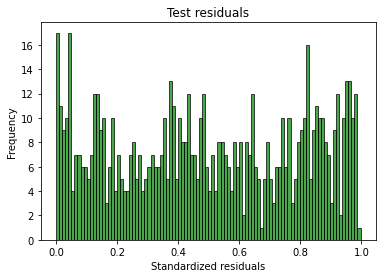

Train KS 0.001947347870054118


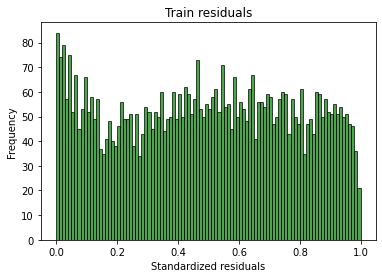

In [32]:
import matplotlib.pyplot as plt
import numpy as np
def plot_histogram(data:np.array, title:str='Histogram of standardized residuals'):
    plt.hist(data, bins=100, alpha=0.7, color='g', edgecolor='black')
    plt.title(title)
    plt.xlabel('Standardized residuals')
    plt.ylabel('Frequency')
    plt.show()


split_date = dt.datetime(2020,12,31)
am = arch_model(ts, vol='Garch', p=3, o=0, q=3, dist='t', mean="AR", lags=5)
res = am.fit(update_freq=5, last_obs=split_date)
test = res.forecast()
standardized_residuals = (ts-test.mean["h.1"])/test.variance["h.1"]
standardized_residuals = standardized_residuals.dropna()
parameters = res.params
cdf_values = am.distribution.cdf(standardized_residuals, parameters = [parameters["nu"]])

print("Test KS", kstest(cdf_values, 'uniform').pvalue)
plot_histogram(cdf_values, title="Test residuals")
standardized_residuals = res.std_resid.dropna()
cdf_values = am.distribution.cdf(standardized_residuals, parameters = [parameters["nu"]])
print("Train KS", kstest(cdf_values, 'uniform').pvalue)
plot_histogram(cdf_values, title="Train residuals")


In [3]:
import pandas as pd
df = pd.concat([ts.shift(i) for i in range(0, 6)],axis=1).dropna()
df.columns = ["t", "t-1", "t-2", "t-3", "t-4", "t-5"]
val_df = df[df.index>split_date]
train_df = df[df.index<=split_date]
y_val = val_df["t"]
X_val = val_df.drop(columns=["t"])
y_train = train_df["t"]
X_train = train_df.drop(columns=["t"])

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.stats import kstest
import random

def quantile_loss(y_pred, y_true, quantile):
    error = y_true - y_pred
    loss = torch.max(quantile * error, (quantile - 1) * error)
    return torch.mean(loss)

class QuantileLoss(torch.nn.Module):
    def __init__(self):
        super(QuantileLoss, self).__init__()

    def forward(self, yhat, y, tau):
        diff = yhat - y
        mask = (diff.ge(0).float() - tau).detach()
        return (mask * diff).mean()
    
hidden_dim = 10

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim+1, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, qu):
        x = torch.cat((x, qu), 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x
    
"""
hidden_dim = 40
class SimpleMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim+1, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, qu):
        x = torch.cat((x, qu), 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
"""    

def KS_metric(model, X, y):
    pred_q = vectorized_bisection(model, X, y)
    return kstest(pred_q.numpy().ravel(), 'uniform').pvalue

def MSE_metric(model, X, y):
    with torch.no_grad():
        q = torch.ones(y.shape)*0.5
        pred = model(X, q)
    return torch.mean((pred-y)**2)
    
def vectorized_bisection(model, X, y):
    lower_bound = torch.zeros(y.shape)
    upper_bound = torch.ones(y.shape)
    quantiles = torch.zeros(y.shape)
    for _ in range(100):
        with torch.no_grad():
            quantiles = (upper_bound + lower_bound)/2
            outputs = model(X, quantiles)

            lower_bound[outputs<y] = quantiles[outputs<y]
            upper_bound[outputs>=y] = quantiles[outputs>=y]
        
    return (lower_bound+upper_bound)/2


torch.manual_seed(42)

input_dim = 5

output_dim = 1
learning_rate = 0.005
num_epochs = 10000
num_samples = X_train.shape[0]

model = SimpleMLP(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

criterion = QuantileLoss()

def MeanAbsoluteErrorLoss(y_pred, y_true):
    return torch.mean(torch.abs(y_pred-y_true))

criterion2 = MeanAbsoluteErrorLoss

X = torch.tensor(X_train.values, dtype=torch.float32)
y = torch.tensor(y_train.values, dtype=torch.float32)
y = y.unsqueeze(1)
X_val_ = torch.tensor(X_val.values, dtype=torch.float32)
y_val_ = torch.tensor(y_val.values, dtype=torch.float32)
y_val_ = y_val_.unsqueeze(1)
# Training loop
for epoch in range(num_epochs):

    loss = 0
    for i in range(10):
        if random.random() < 0.33:
            qu = torch.rand(num_samples, 1)**5
        elif random.random() > 0.66:
            qu = torch.rand(num_samples, 1)**(1/5)
        else:
            qu = torch.rand(num_samples, 1)
        outputs = model(X, qu)
        loss+= criterion(outputs, y, qu)
    #qu_median = torch.ones(num_samples, 1)*0.5
    #outputs2 = model(X, qu_median)
    #loss+=3*criterion2(outputs2, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 10 == 0:
        metric = KS_metric(model, X_val_, y_val_)
        metric2 = MSE_metric(model, X_val_, y_val_)
        train_metric = KS_metric(model, X, y)
        train_metric2 = MSE_metric(model, X, y)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, KS: {metric:.16f}, MSE: {metric2:.8f}, Train KS: {train_metric:.16f}, Train MSE: {train_metric2:.8f}')

Epoch [10/10000], Loss: 4.0448, KS: 0.0000000000000000, MSE: 1.24673188, Train KS: 0.0000000000000000, Train MSE: 1.57303882
Epoch [20/10000], Loss: 4.0302, KS: 0.0000000000000000, MSE: 1.24534261, Train KS: 0.0000000000000000, Train MSE: 1.56971228
Epoch [30/10000], Loss: 3.9763, KS: 0.0000000000000000, MSE: 1.24960828, Train KS: 0.0000000000000000, Train MSE: 1.57282865
Epoch [40/10000], Loss: 3.6781, KS: 0.0000000000000000, MSE: 1.25167906, Train KS: 0.0000000000000000, Train MSE: 1.57035279
Epoch [50/10000], Loss: 3.4108, KS: 0.0000000000000000, MSE: 1.26005065, Train KS: 0.0000000000000000, Train MSE: 1.57190633
Epoch [60/10000], Loss: 3.1171, KS: 0.0000000000000000, MSE: 1.27249098, Train KS: 0.0000000000000000, Train MSE: 1.58096290
Epoch [70/10000], Loss: 2.6518, KS: 0.0000000000000000, MSE: 1.28274965, Train KS: 0.0000000000000000, Train MSE: 1.58767617
Epoch [80/10000], Loss: 2.8722, KS: 0.0000000000016394, MSE: 1.25880444, Train KS: 0.0000000000000000, Train MSE: 1.55434692


KeyboardInterrupt: 

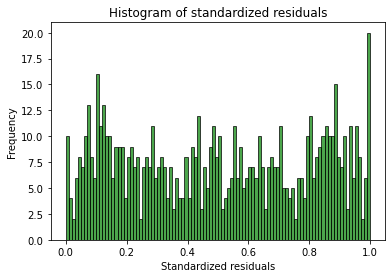

In [51]:
plot_histogram(
    vectorized_bisection(model, X_val_, y_val_).ravel().numpy()
    )


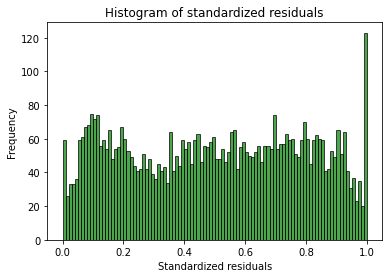

In [52]:
plot_histogram(
    vectorized_bisection(model, X, y).ravel().numpy()
    )


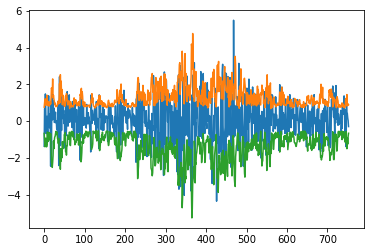

In [118]:
with torch.no_grad():
    num_samples = X_val_.shape[0]
    qu_l= torch.ones(num_samples, 1)*0.1
    qu_u= torch.ones(num_samples, 1)*0.9
    lower_bound = model(X_val_, qu_l)
    upper_bound = model(X_val_, qu_u)
np.logical_or(y_val_.numpy() < lower_bound.numpy(), y_val_.numpy() > upper_bound.numpy()).sum()/num_samples
plt.plot(y_val_.numpy())
plt.plot(upper_bound.numpy())
plt.plot(lower_bound.numpy())

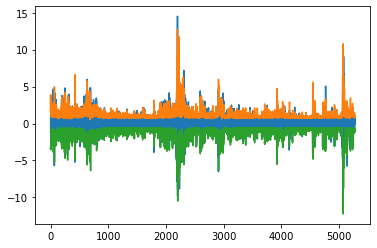

In [115]:
with torch.no_grad():
    num_samples = X.shape[0]
    qu_l= torch.ones(num_samples, 1)*0.1
    qu_u= torch.ones(num_samples, 1)*0.9
    lower_bound = model(X, qu_l)
    upper_bound = model(X, qu_u)
plt.plot(y.numpy())
plt.plot(upper_bound.numpy())
plt.plot(lower_bound.numpy())

In [121]:
res = []
for i in range(1,100):
    with torch.no_grad():
        qu = torch.ones(2, 1)*i/100
        pred = model(X[:2,:], qu)
        res.append(pred)

In [125]:
[float(x[0]) for x in res]

[-5.466403961181641,
 -5.196375370025635,
 -4.926346778869629,
 -4.656318187713623,
 -4.42630672454834,
 -4.213440895080566,
 -4.000574588775635,
 -3.787708282470703,
 -3.5748422145843506,
 -3.361975908279419,
 -3.1491096019744873,
 -2.9362432956695557,
 -2.723377227783203,
 -2.5105109214782715,
 -2.2976441383361816,
 -2.084778308868408,
 -1.8719120025634766,
 -1.6590455770492554,
 -1.4461793899536133,
 -1.233312964439392,
 -1.020447015762329,
 -0.8579829931259155,
 -0.7825182676315308,
 -0.664705753326416,
 -0.5468933582305908,
 -0.42908111214637756,
 -0.31126758456230164,
 -0.1934555470943451,
 -0.145484060049057,
 -0.12553831934928894,
 -0.10559222102165222,
 -0.0856463611125946,
 -0.06570014357566833,
 -0.04575452208518982,
 -0.02580830454826355,
 -0.005862444639205933,
 0.014083892107009888,
 0.034029871225357056,
 0.05397537350654602,
 0.07392159104347229,
 0.09763053059577942,
 0.13084962964057922,
 0.16406908631324768,
 0.19728878140449524,
 0.23050788044929504,
 0.263727575540

In [126]:
import yfinance as yf
from datetime import datetime

# Define the ticker symbol for SPY
ticker_symbol = 'SPY'

# Define the expiry date of the options contract (format: YYYY-MM-DD)
expiry_date = '2024-02-16'

# Define the option type (either 'call' or 'put')
option_type = 'call'

# Define the strike price of the option
strike_price = 400

# Define the start and end dates for the historical data (format: YYYY-MM-DD)
start_date = '2023-02-01'
end_date = '2024-02-13'

# Download historical option prices
option_chain = yf.Ticker(ticker_symbol).option_chain(expiry_date)
option_data = option_chain.calls if option_type == 'call' else option_chain.puts
option_prices = option_data[option_data['strike'] == strike_price]

# Filter data based on date range
option_prices = option_prices[(option_prices.index >= start_date) & (option_prices.index <= end_date)]

# Print the historical option prices
print(option_prices)

TypeError: Invalid comparison between dtype=int64 and str

In [128]:
option_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY240216C00210000,2024-02-13 17:44:00+00:00,210.0,285.49,283.89,284.54,-5.040008,-1.734764,31.0,374,3.101565,True,REGULAR,USD
1,SPY240216C00215000,2024-02-13 19:18:32+00:00,215.0,277.17,278.94,279.52,18.950012,7.338708,1.0,1,3.054690,True,REGULAR,USD
2,SPY240216C00220000,2024-01-11 20:26:55+00:00,220.0,257.36,281.10,281.43,0.000000,0.000000,1.0,10,5.600345,True,REGULAR,USD
3,SPY240216C00230000,2023-11-17 16:49:14+00:00,230.0,221.54,241.12,243.58,0.000000,0.000000,2.0,1,0.000010,True,REGULAR,USD
4,SPY240216C00235000,2024-01-09 14:56:23+00:00,235.0,238.22,263.37,263.68,0.000000,0.000000,1.0,0,4.642582,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,SPY240216C00555000,2024-02-06 17:08:09+00:00,555.0,0.01,0.00,0.01,0.000000,0.000000,10.0,6640,0.378912,False,REGULAR,USD
168,SPY240216C00560000,2024-02-13 16:41:20+00:00,560.0,0.01,0.00,0.00,0.000000,0.000000,1.0,8765,0.250007,False,REGULAR,USD
169,SPY240216C00565000,2024-01-30 15:07:59+00:00,565.0,0.02,0.00,0.01,0.000000,0.000000,1.0,18527,0.429693,False,REGULAR,USD
170,SPY240216C00570000,2024-02-09 16:25:39+00:00,570.0,0.01,0.00,0.01,0.000000,0.000000,5.0,11139,0.453130,False,REGULAR,USD
